<a href="https://colab.research.google.com/github/githubdcw/KU-WPT/blob/main/data/s2p/mutual_inductance_from_s2p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install https://scikit-rf.readthedocs.io/en/latest/

In [1]:
!pip -q install scikit-rf 

     |████████████████████████████████| 3.2 MB 5.1 MB/s 


In [2]:
import numpy as np
import pandas as pd
import skrf as rf
from skrf import Network, Frequency
import scipy.constants as const
e0 =const.epsilon_0

## Sonnet file
https://raw.githubusercontent.com/githubdcw/KU-WPT/main/data/s2p/sq_coil002.son

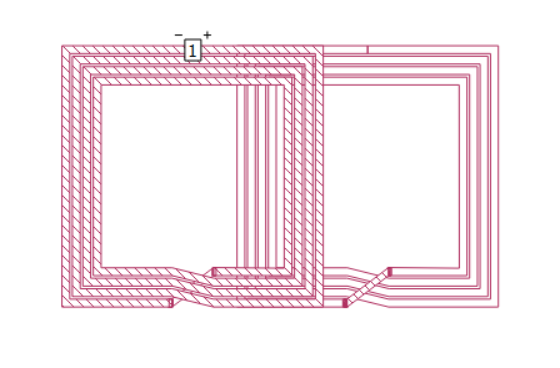

Download simulated result for square coil.

In [3]:
!wget https://raw.githubusercontent.com/githubdcw/KU-WPT/main/data/s2p/sq_coil002.s2p

--2022-12-10 16:20:23--  https://raw.githubusercontent.com/githubdcw/KU-WPT/main/data/s2p/sq_coil002.s2p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 509 [text/plain]
Saving to: ‘sq_coil002.s2p’

sq_coil002.s2p      100%[===================>]     509  --.-KB/s    in 0s      

2022-12-10 16:20:23 (21.5 MB/s) - ‘sq_coil002.s2p’ saved [509/509]



Load data to Network.

In [5]:
coil = Network('/content/sq_coil002.s2p')

In [6]:
print(coil)

2-Port Network: 'sq_coil002',  0.013-0.014 GHz, 2 pts, z0=[50.+0.j 50.+0.j]


Find INPUT impedance of the coil.

In [7]:
Z = coil.z
print(Z)

[[[0.61267864+250.42233638j 0.13835785 +22.43459026j]
  [0.13835785 +22.43459026j 0.56510482+248.46327151j]]

 [[0.81018417+277.03781223j 0.18762035 +25.72690351j]
  [0.18762035 +25.72690351j 0.74491338+274.3985492j ]]]


In [10]:
Z[0][0][1]

(0.13835785133282474+22.43459025863562j)

Find Inducetance.  
$X_L = 2 \pi f L$  
$L = \frac {X_L}{2 \pi f}$

In [11]:
tmp = Z
print('Mutual Inductance of the coil at', coil.frequency.f[0],'Hz is', tmp [0][0][1].imag/(2*np.pi*coil.frequency.f[0]), 'H')
print('Mutual Inductance of the coil at', coil.frequency.f[1],'Hz is', tmp [1][0][1].imag/(2*np.pi*coil.frequency.f[1]), 'H')


Mutual Inductance of the coil at 13000000.0 Hz is 2.7465968737716474e-07 H
Inductance of the coil at 14000000.0 Hz is 2.924688474258213e-07 H


In [12]:
tmp = Z
print('Mutual Inductance of the coil at', coil.frequency.f[0]/1e6,'MHz is', "{:.2f}".format(tmp [0][0][1].imag/(2*np.pi*coil.frequency.f[0])*1e6), 'uH')
print('Mutual Inductance of the coil at', coil.frequency.f[1]/1e6,'MHz is', "{:.2f}".format(tmp [1][0][1].imag/(2*np.pi*coil.frequency.f[1])*1e6), 'uH')


Mutual Inductance of the coil at 13.0 MHz is 0.27 uH
Mutual Inductance of the coil at 14.0 MHz is 0.29 uH
